In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Step 1: Import the dataset
df = pd.read_csv("Sales.csv")

In [28]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics for numerical variables
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Columns: 2556 entries, Rating to Mobile_vivo Z1x
dtypes: float64(2), int64(3), uint8(2551)
memory usage: 7.7 MB
None
            Rating  Selling Price  Original Price      Discount  \
count  3114.000000    3114.000000     3114.000000   3114.000000   
mean      4.243098   26436.625562    28333.473025   1896.847463   
std       0.265625   30066.892622    31525.599889   5337.126176   
min       2.300000    1000.000000     1000.000000  -8000.000000   
25%       4.100000    9990.000000    10030.250000      0.000000   
50%       4.300000   15000.000000    16889.500000      0.000000   
75%       4.400000   28999.000000    31500.000000   2000.000000   
max       5.000000  179900.000000   189999.000000  75000.000000   

       discount percentage  Brands_ASUS  Brands_Apple  Brands_GIONEE  \
count          3114.000000  3114.000000   3114.000000    3114.000000   
mean              6.086788     0.037893      0.124277       0

In [35]:
# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values
# For numerical columns, fill missing values with mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, fill missing values with mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Missing Values:
Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


In [25]:
# Step 3: Descriptive statistics for numerical columns
print("\n Descriptive Statistics for Numerical Columns:")
print(df.describe())


 Descriptive Statistics for Numerical Columns:
            Rating  Selling Price  Original Price      Discount  \
count  3114.000000    3114.000000     3114.000000   3114.000000   
mean      4.243098   26436.625562    28333.473025   1896.847463   
std       0.265625   30066.892622    31525.599889   5337.126176   
min       2.300000    1000.000000     1000.000000  -8000.000000   
25%       4.100000    9990.000000    10030.250000      0.000000   
50%       4.300000   15000.000000    16889.500000      0.000000   
75%       4.400000   28999.000000    31500.000000   2000.000000   
max       5.000000  179900.000000   189999.000000  75000.000000   

       discount percentage  Brands_ASUS  Brands_Apple  Brands_GIONEE  \
count          3114.000000  3114.000000   3114.000000    3114.000000   
mean              6.086788     0.037893      0.124277       0.041426   
std              11.106776     0.190969      0.329951       0.199305   
min            -160.320641     0.000000      0.000000       

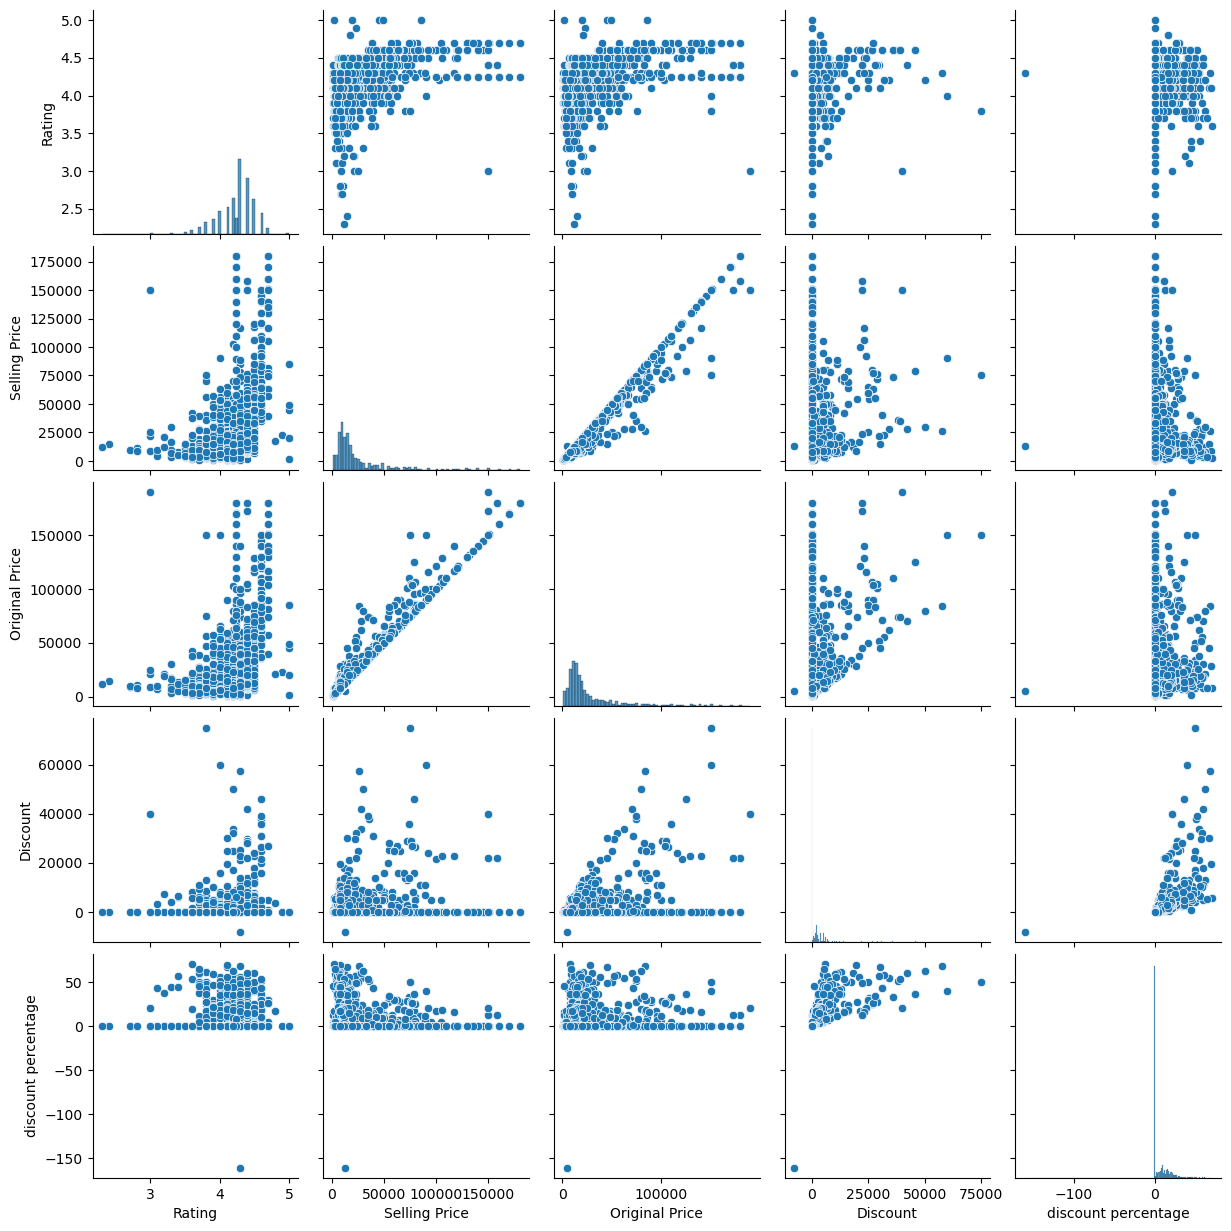

C:\Users\HP 348 G7\AppData\Local\Temp\ipykernel_17900\1914564142.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


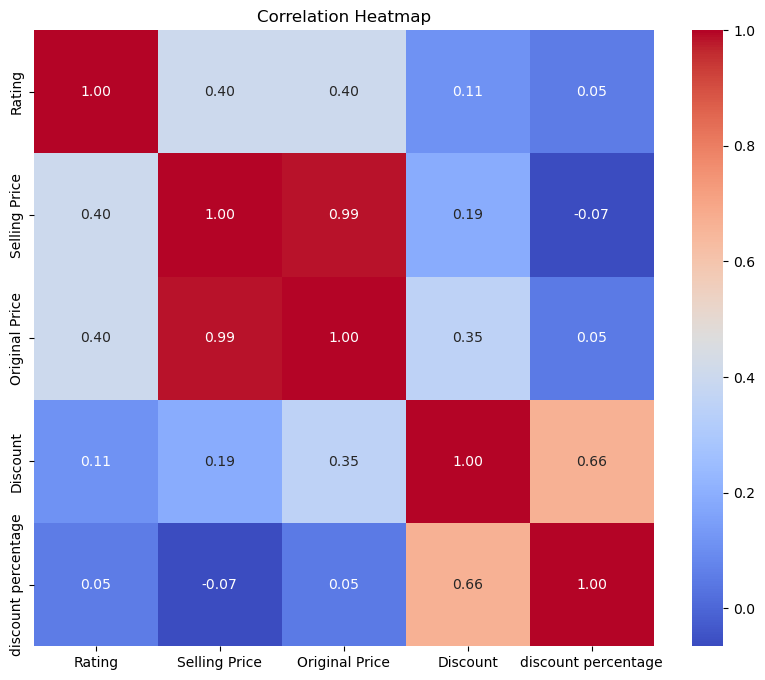

In [6]:
# Step 4: Explore distributions and relationships
# Pairplot for numerical columns
sns.pairplot(df[numerical_cols])
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [36]:
# Step 5: Encode categorical variables
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols)

# Display updated dataframe
print("\n Updated DataFrame with Encoded Categorical Variables:")
print(df.head())


 Updated DataFrame with Encoded Categorical Variables:
   Rating  Selling Price  Original Price  Discount  discount percentage  \
0     4.3          19330           20999      1669             7.947998   
1     3.8          10199           10199         0             0.000000   
2     4.4           6999            7999      1000            12.501563   
3     4.2          12999           12999         0             0.000000   
4     4.6          49900           49900         0             0.000000   

   Brands_ASUS  Brands_Apple  Brands_GIONEE  Brands_Google Pixel  Brands_HTC  \
0            0             0              0                    0           0   
1            0             0              0                    0           0   
2            0             0              0                    0           0   
3            0             0              0                    0           0   
4            0             1              0                    0           0   

   ...  Mobi

In [9]:
#Regression Analysis

# Step 1: Split data into features (X) and target variable (y)
X = df.drop(columns=['Selling Price'])
y = df['Selling Price']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Interpret the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n Coefficients:")
print(coefficients)

Mean Squared Error: 9.391731717398328e-20
R-squared: 1.0

 Coefficients:
                  Feature   Coefficient
0                  Rating  5.142820e-11
1          Original Price  1.000000e+00
2                Discount -1.000000e+00
3     discount percentage  1.403872e-12
4             Brands_ASUS  1.878308e-10
...                   ...           ...
2550      Mobile_vivo Y93 -1.090122e-10
2551      Mobile_vivo Y94 -2.388153e-11
2552      Mobile_vivo Y95 -2.404250e-12
2553   Mobile_vivo Z1 Pro -1.244651e-10
2554      Mobile_vivo Z1x  1.039353e-11

[2555 rows x 2 columns]


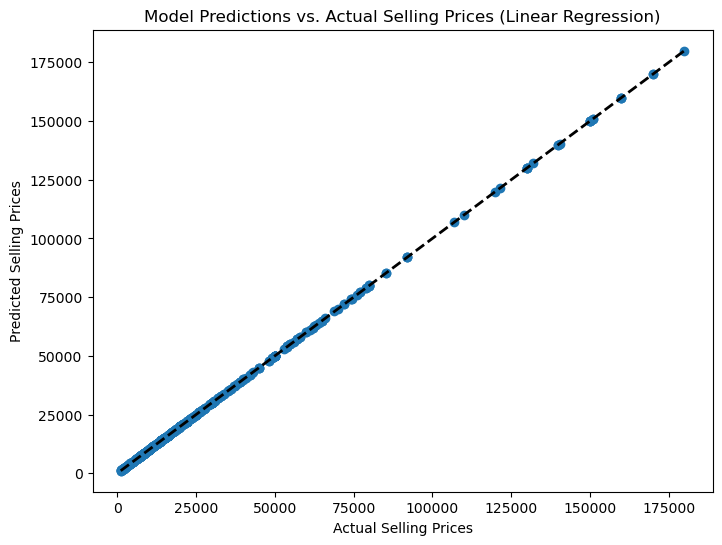

In [12]:
# Visualize model predictions vs. actual selling prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Model Predictions vs. Actual Selling Prices (Linear Regression)")
plt.show()